# **LetsGrowMore Virtual Internship Program (August-2022)**

**Beginner Level Task **

Name :- Ayush Kumar

Task 1 :- Iris Flowers Classification ML Project 

This particular ML project is usually referred to as the “Hello World” of Machine Learning. The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.

Explanations written.

Importing the Important Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns


LOADING THE DATASET

In [ ]:
df = pd.read_csv('Iris.csv',index_col='Id')
df.reset_index(drop=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


**ANALYSING THE DATASET**

In [ ]:
df.shape

(151, 5)

In [ ]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica
150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [ ]:
df.duplicated().value_counts()

False    147
True       3
dtype: int64

In [ ]:
df['Species'].replace({'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3},inplace=True)

In [ ]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


In [ ]:
df['Species'].unique()

array([1, 2, 3])

**VISUALIZATION OF DATASET**

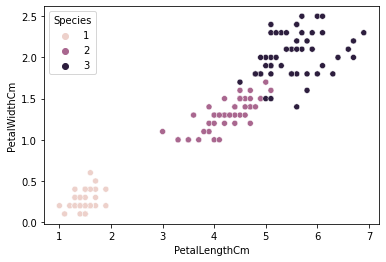

In [ ]:
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm', data=df ,hue='Species')

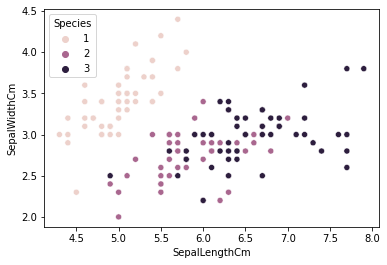

In [ ]:
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm', data=df ,hue='Species')

Text(87.0, 0.5, 'Actual')

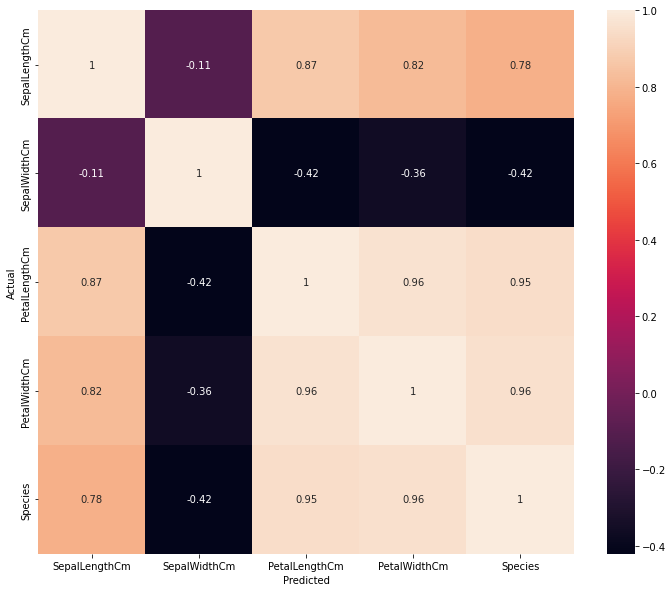

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(data=df.corr(),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

Text(0, 0.5, 'Count')

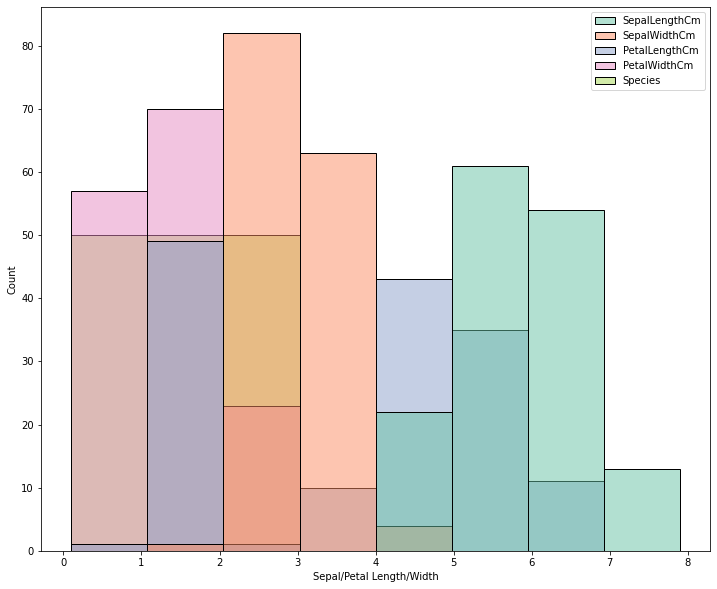

In [ ]:
plt.figure(figsize=(12,10))
sns.histplot(data=df,bins=8,palette='Set2')
plt.xlabel('Sepal/Petal Length/Width')
plt.ylabel('Count')

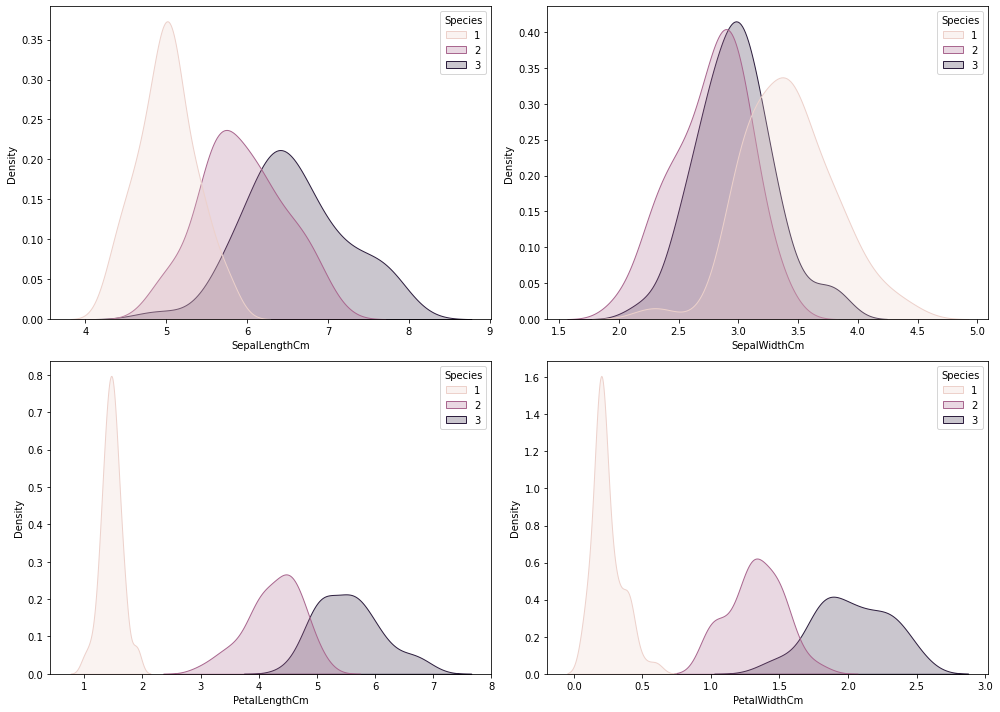

In [ ]:
from IPython.core.pylabtools import figsize
fig,axes = plt.subplots(figsize=(14,10),nrows=2,ncols=2)
sns.kdeplot(data=df,x='SepalLengthCm',hue='Species',shade=True,ax=axes[0][0])
sns.kdeplot(data=df,x='SepalWidthCm',hue='Species',shade=True,ax=axes[0][1])
sns.kdeplot(data=df,x='PetalLengthCm',hue='Species',shade=True,ax=axes[1][0])
sns.kdeplot(data=df,x='PetalWidthCm',hue='Species',shade=True,ax=axes[1][1])
plt.tight_layout()
plt.show()

APPLYING LOGISTIC REGRESSION MODEL

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
x = df.drop('Species',axis=1)

In [ ]:
y = df['Species']

In [ ]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0


In [ ]:
y

Id
1      1
2      1
3      1
4      1
5      1
      ..
146    3
147    3
148    3
149    3
150    3
Name: Species, Length: 150, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
23,4.6,3.6,1.0,0.2
16,5.7,4.4,1.5,0.4
66,6.7,3.1,4.4,1.4
12,4.8,3.4,1.6,0.2
43,4.4,3.2,1.3,0.2
...,...,...,...,...
72,6.1,2.8,4.0,1.3
107,4.9,2.5,4.5,1.7
15,5.8,4.0,1.2,0.2


In [ ]:
x_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
74,6.1,2.8,4.7,1.2
19,5.7,3.8,1.7,0.3
119,7.7,2.6,6.9,2.3
79,6.0,2.9,4.5,1.5
77,6.8,2.8,4.8,1.4


In [ ]:
y_test

Id
74     2
19     1
119    3
79     2
77     2
32     1
65     2
142    3
69     2
83     2
111    3
13     1
37     1
10     1
20     1
57     2
105    3
70     2
56     2
133    3
30     1
128    3
27     1
129    3
132    3
146    3
109    3
144    3
46     1
31     1
Name: Species, dtype: int64

In [ ]:
y_train

Id
23     1
16     1
66     2
12     1
43     1
      ..
72     2
107    3
15     1
93     2
103    3
Name: Species, Length: 120, dtype: int64

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(x,y)

LogisticRegression()

In [ ]:
model.coef_

array([[-0.42339954,  0.96170963, -2.5195144 , -1.08594123],
       [ 0.53415033, -0.3179707 , -0.20537656, -0.93966834],
       [-0.11075079, -0.64373893,  2.72489096,  2.02560957]])

In [ ]:
model.intercept_

array([  9.88126443,   2.21931668, -12.1005811 ])

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([2, 1, 3, 2, 2, 1, 2, 3, 2, 2, 3, 1, 1, 1, 1, 2, 3, 2, 2, 3, 1, 3,
       1, 3, 3, 3, 3, 3, 1, 1])

ACCURACY 

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
conf = confusion_matrix(y_test,y_pred)

In [ ]:
conf

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

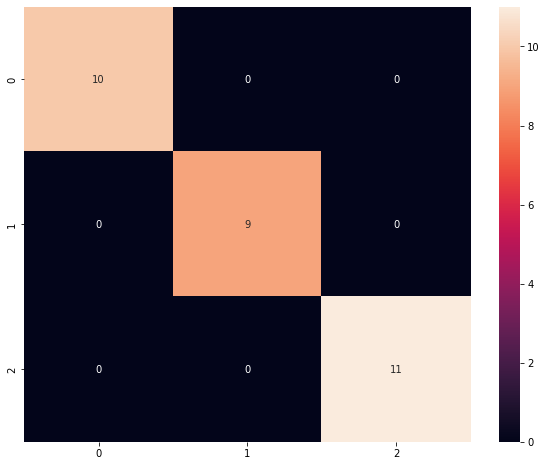

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data=conf,annot=True)

In [ ]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
model.score(x,y)*100

97.33333333333334

In [ ]:
model.score(x_train,y_train)*100

96.66666666666667

In [ ]:
model.score(x_test,y_pred)*100

100.0

ERROR

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
mae = mean_absolute_error(y_test,y_pred)

In [ ]:
mae

0.0

In [ ]:
mse=mean_squared_error(y_test,y_pred)

In [ ]:
mse

0.0